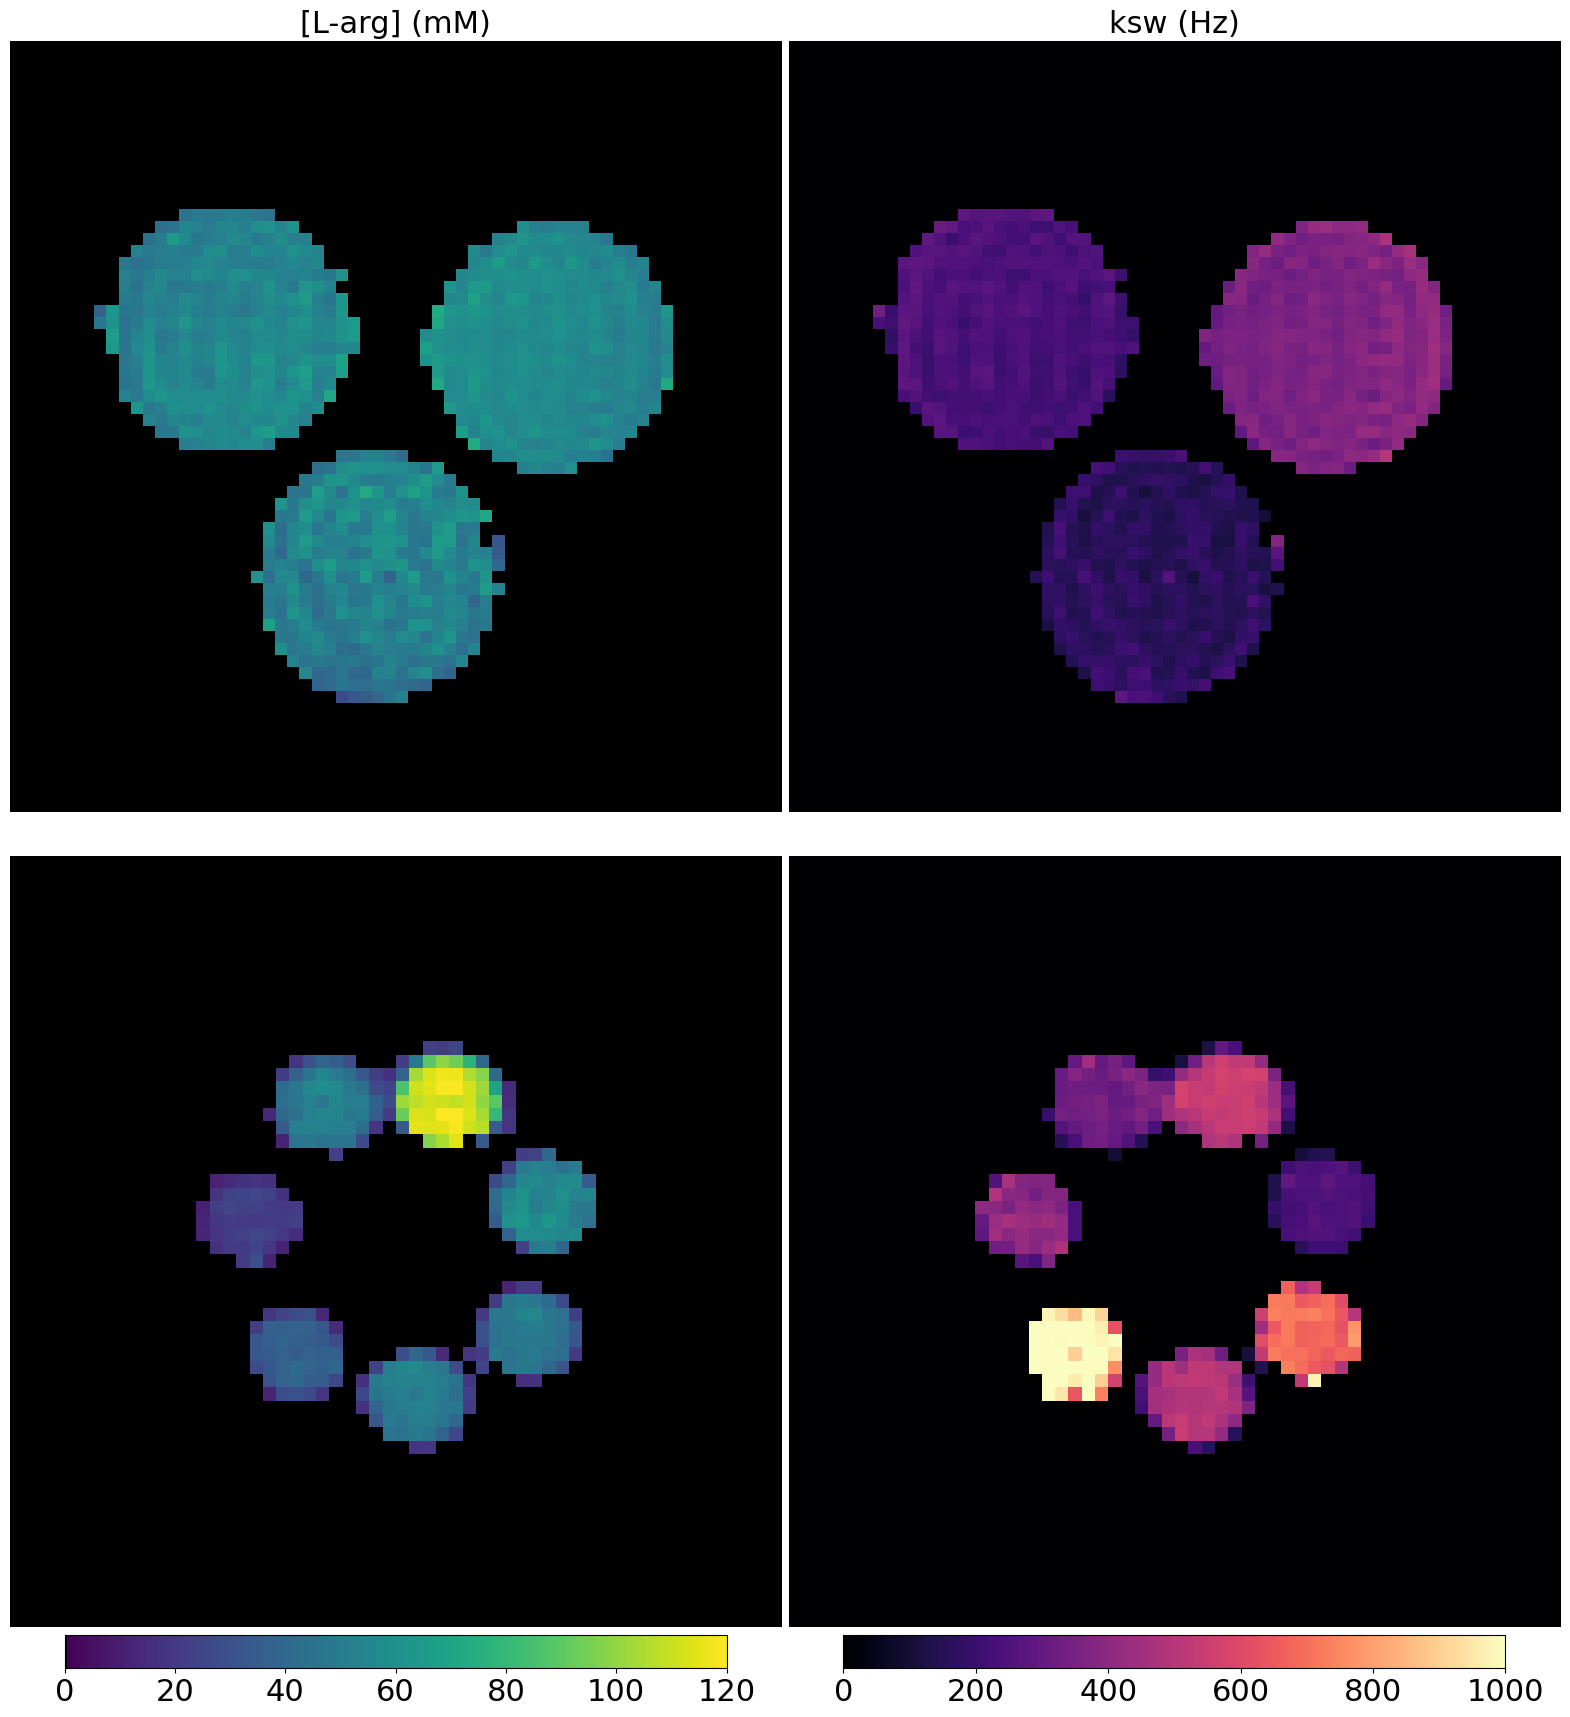

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
import scipy.io as sio
import os

# Function to modify the viridis colormap to start with black
def create_black_viridis():
    original_viridis = plt.cm.get_cmap('viridis')
    colors = original_viridis(np.arange(original_viridis.N))
    colors[0, :3] = 0  # Set the lowest value to black
    return mcolors.LinearSegmentedColormap.from_list('black_viridis', colors)

# Load data and masks
quant_maps7 = sio.loadmat(r'results/nn_reco_maps_preclinical.mat')
quant_maps = sio.loadmat(r'results/nn_reco_maps_clinical.mat')


# Combine masks for more refined visualization

# load mask from created using dot-product values
mask7 = np.load(f'{os.path.dirname(os.getcwd())}/dot_prod_example/mask.npy')
# load mask from created using dot-product values
mask = np.load(f'{os.path.dirname(os.getcwd())}/dot_prod_example/mask_3T.npy')

for k,v in quant_maps.items():
    if k not in ['__header__', '__version__', '__globals__']:
        quant_maps[k] = v[15:-15, 15:-15]

mask = mask[15:-15, 15:-15]

# Create a black-start viridis colormap
b_viridis = create_black_viridis()

# Initialize PDF
with PdfPages('results/dot_product_results_both.pdf') as pdf:
    fig, axs = plt.subplots(2, 2, figsize=(20, 21.5))
    fig.subplots_adjust(wspace=0.01, hspace=0.001)  # Remove spacing between subplots

    data_info = [
        (quant_maps7['fs'] * 110e3 / 3 * mask7, b_viridis, '[L-arg] (mM)', np.arange(0, 140, 20), (0, 120)),
        (quant_maps7['ksw'] * mask7, 'magma', 'ksw (Hz)', np.arange(0, 1200, 200), (0, 1000)),
        (quant_maps['fs'] * 110e3 / 3 * mask, b_viridis, '', np.arange(0, 140, 20), (0, 120)),
        (quant_maps['ksw'] * mask, 'magma', '', np.arange(0, 1200, 200), (0, 1000)),
    ]

    for i, (ax, (data, cmap, title, ticks, clim)) in enumerate(zip(axs.flat, data_info)):
        im = ax.imshow(data, cmap=cmap)
        im.set_clim(*clim)
        if title:
            ax.set_title(title, fontsize=22)
        ax.set_axis_off()
        if i > 1:
            orientation = 'horizontal'
            cb = fig.colorbar(im, ax=ax, orientation=orientation, ticks=ticks, pad=0.01, fraction=0.04)
            cb.ax.tick_params(labelsize=22)

    pdf.savefig(fig)
